# EECS 469/569: Homework 1 Submission
## Serial Performance of Roaring Thunder
### Due: Sunday, Sep. 11 *before* midnight

## Name 1: Chen-Wei Hung
## Name 2: Matt Dentlinger
**Take away:** This homeworks gave us the the ability to navigate with linux system using commnad lines, and instroduced us to the slurm job scheduling with slurm on roaring thunder. It was interesting to see how different algorithms affect the execution performance, even though they all produced the same results. And we are also instroduced with plotting in Python and some basic data processing. 

**Work load distribution**:
We worked together at all times in person during our meetings, we set up a github for file sharing. For different parts, we did the same thing individually and discussed our findings. Lastly, we finalized the submission on Chen-Wei's machine. 

### Submission Instructions

Follow all instructions within `hw01.ipynb`. To submit the homework assignment, put **only relevant files (including this notebook)** in a folder. Zip the folder (e.g., using [7-zip](https://www.7-zip.org/)) and send one email to Dr. Hansen (CC your partner) with the zipped folder. Print a .pdf of this (completed) Jupyter notebook and submit it to D2L before the deadline (`CTRL+P` $\rightarrow$ `Save as PDF` in Google Chrome). 

It is your responsibility that all of the figures, plots, source code, etc. properly appear in the submitted notebook. 

**FINAL DELIVERABLE (5 points):** ***After*** you have completed the entire assignment, write a few paragraphs on your main takeaways from the assignment. **Clearly state** how the work was split up between you and your partner. 



## 1. Basic Unix Commands

**1.1 DELIVERABLE (3 points):** Include a screenshot of your terminal after executing the Bash commands on the Roaring Thunder, and write a few sentences describing what the commands did.

![hello](linux_commands.jpg)
```bash
pwd: show working directory
man pwd %'spacebar' to page down, 'q' to quit: man show the manual of a command
ls: list file 
ls -al: -la is the list/all flag
ls -a: -a is a flag, stands for all
ls -l: -l is a flag, stands for list
man head: show the manual of head command, and head print the first part of a file
mkdir eecs569: make a directory call eecs569
chmod 700 eecs569: Protects a file against any access from other users, while the issuing user still has full access
cd eecs569: change the pwd to eecs569
pwd: show working directory
cd: change the homedirectory
pwd: present working directory
```

**1.2 DELIVERABLE (2 points):** Take a screenshot of the output of hello\_world and the files in your directory (use `ls -al`) and paste here. Write a couple sentences about modules and the gcc compiler.

![hello](helloworld.jpg)

modules are programms that can be loaded and used my the user, and gcc is one of the example. And gcc compiles C code

## 2. Memory Input/Output (I/O) Performance

**2.1 DELIVERABLE (10 points):** Test the write performance of the cluster by timing the output of writing $10^{-4}$ to $10^4$ MB. Plot your results using a statistical method (i.e., run multiple times per filesize, and plot the distributions). Discuss in one paragraph the write performance of the Roaring Thunder cluster and any key takeaways you notice. 

Link to your dataset here: [write data CSV](fwrite_new.csv)

**Discusion**
The write performance increases as the data size increases, but it hit a maximum of speed about 4000MB/s after the data file grows to 100MB. For smaller data sizes, the slow speed can be attributed to the overhead of initialization. So the key take away is the performance peaks at about 4000MB/s.

<AxesSubplot:xlabel='MB', ylabel='MB/s'>

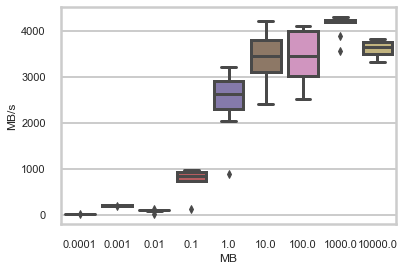

In [1]:
# put your write speed plotting code here
# I recommend using matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import numpy as np

#optional, load seaborn for nicer looking plots
import seaborn as sns
'''
This breaks for versions of seaborn < 0.11.0. Google Colab has latest version.
To install in Anaconda, use "conda install seaborn=0.11.2"
'''
sns.set_theme(style="whitegrid",context="poster", font_scale=0.5) 

#load column headers into array
data = np.genfromtxt('fwrite_new.csv', delimiter=',', names=True)

## create figure
# f,ax = plt.subplots()
# ax.set(xscale='log',xlim=(0.00005,1500),ylabel='MB/s',xlabel='MB')
# plt.plot(data['MB'],data['MBs'],marker='.')

# put your read speed plotting code here
data = np.genfromtxt('fwrite_new.csv', delimiter=',', names=True)

f,ax = plt.subplots()
ax.set(ylabel='MB/s',xlabel='MB')

sns.boxplot(x=data['MB'],y=data['MBs'])

**2.2 DELIVERABLE (10 points):** Test the read speed of the cluster by timing the read of the files you created in the previous section from $10^{-4}$ to $10^4$ MB. Plot your results using a statistical method (i.e., run multiple times per filesize, and plot the distributions). Discuss in one paragraph the write performance of the Roaring Thunder cluster and any key takeaways you notice. How does the read speed compare to the write speed?

Link to your dataset here: [read data CSV](fread_new.csv)

**Discussion**: The read speed peaks at about 3000MB/s, which is slower than write speed's 4000MB/S.

<AxesSubplot:xlabel='MB', ylabel='MB/s'>

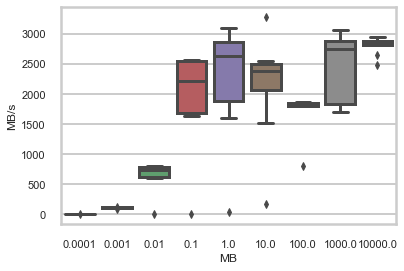

In [2]:
# put your read speed plotting code here
# todo
# put your write speed plotting code here
# I recommend using matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import numpy as np

#optional, load seaborn for nicer looking plots
import seaborn as sns
'''
This breaks for versions of seaborn < 0.11.0. Google Colab has latest version.
To install in Anaconda, use "conda install seaborn=0.11.2"
'''
sns.set_theme(style="whitegrid",context="poster", font_scale=0.5) 

#load column headers into array
data = np.genfromtxt('fread_new.csv', delimiter=',', names=True)

#create figure
# f,ax = plt.subplots()
# ax.set(xscale='log',xlim=(0.00005,1500),ylabel='MB/s',xlabel='MB')
# plt.plot(data['MB'],data['MBs'],marker='.')

# put your read speed plotting code here
data = np.genfromtxt('fread_new.csv', delimiter=',', names=True)

f,ax = plt.subplots()
ax.set(ylabel='MB/s',xlabel='MB')

sns.boxplot(x=data['MB'],y=data['MBs'])

## 3. Sequential Linear Algebra

**3.1 DELIVERABLE (10 points):** Using a dedicated node via SLURM, determine the execution time and Flops for the naive matrix matrix multiplication using $N=2^k$ with $k=6,...,12$. Plot (i) execution time (s) vs. N, and (ii) Flops vs. N. Average each size at least 5 times. Plot a statistical distribution of Flops for $N=2^{12}=4096$. Discuss the scaling of matrix-matrix product using the naive algorithm. 

Link your dataset(s) here: [naive mat-mat CSV](matmul_naive.csv)

**Discussion**: In naive matrix multiplication, the flops did not scale well as it decreased drastically as the N increased, which resulted in longer execution time. The reason behind the slow execution is that the CPU needs to read the memories that are far away from other memories in one flop>  

C:\Users\lucky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


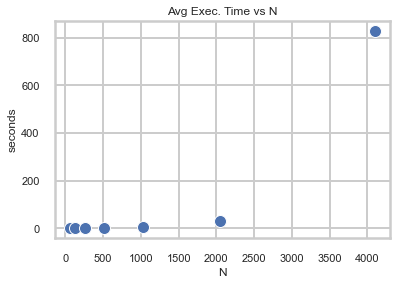

In [3]:
# plot code: average execution time vs N plot
from turtle import title
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


sns.set_theme(style="whitegrid",context="poster", font_scale=0.5) 

#load column headers into array
# data = np.genfromtxt('matmul_naive.csv', delimiter=',', names=True)

dataFrame = pd.read_csv("matmul_naive_ave.csv")

#create figure

sns.scatterplot(dataFrame['N'],dataFrame['s'])
plt.xlabel("N")
plt.ylabel("seconds")
plt.title("Avg Exec. Time vs N")
plt.show()

## plot naive n vs time
# f,ax = plt.subplots()
# ax.set(xscale='log',ylim=(0, 1000),ylabel='Time(s)',xlabel='N')
# plt.title("Naive N vs Time")
# plt.plot(data['N'],data['s'],marker='.')

# put your read speed plotting code here

# data = np.genfromtxt('matmul_naive.csv', delimiter=',', names=True)

# # plot naive n vs time
# f,ax = plt.subplots()
# ax.set(ylabel='Time(s)',xlabel='N', title="Naive N vs time")
# sns.boxplot(x=data['N'],y=data['s'])



C:\Users\lucky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


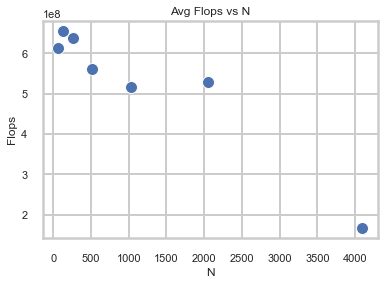

In [4]:
# # plot code: average Flops vs N plot

from turtle import title
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


sns.set_theme(style="whitegrid",context="poster", font_scale=0.5) 

#load column headers into array
# data = np.genfromtxt('matmul_naive.csv', delimiter=',', names=True)

dataFrame = pd.read_csv("matmul_naive_ave.csv")

#create figure

sns.scatterplot(dataFrame['N'],dataFrame['Flops'])
plt.xlabel("N")
plt.ylabel("Flops")
plt.title("Avg Flops vs N")
plt.show()

# import matplotlib.pyplot as plt
# import numpy as np

# #optional, load seaborn for nicer looking plots
# import seaborn as sns
# '''
# This breaks for versions of seaborn < 0.11.0. Google Colab has latest version.
# To install in Anaconda, use "conda install seaborn=0.11.2"
# '''
# sns.set_theme(style="whitegrid",context="poster", font_scale=0.5) 

# #load column headers into array
# data = np.genfromtxt('matmul_naive.csv', delimiter=',', names=True)

# #create figure
# f,ax = plt.subplots()
# ax.set(xscale='log',ylim=(100_000_000, 800_000_000),ylabel='Flops',xlabel='N')
# plt.title("Flops vs N")
# plt.plot(data['N'],data['Flops'],marker='.')

# # put your read speed plotting code here
# data = np.genfromtxt('matmul_naive.csv', delimiter=',', names=True)

# f,ax = plt.subplots()
# ax.set(ylabel='Flops',xlabel='N', title="Flops vs N")

# sns.boxplot(x=data['N'],y=data['Flops'])

<AxesSubplot:title={'center':'Statistical distribution of flops at N=4096'}, xlabel='N=4096', ylabel='Flops'>

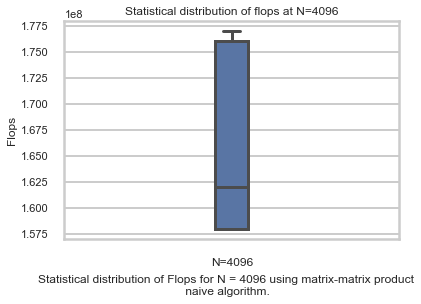

In [5]:
# plot code: statistical plot of Flops at N=4096
from cgitb import text
import matplotlib.pyplot as plt
import numpy as np

#optional, load seaborn for nicer looking plots
import seaborn as sns
'''
This breaks for versions of seaborn < 0.11.0. Google Colab has latest version.
To install in Anaconda, use "conda install seaborn=0.11.2"
'''
sns.set_theme(style="whitegrid",context="poster", font_scale=0.5) 

#load column headers into array
data = np.genfromtxt('matmul_naive.csv', delimiter=',', names=True)

# #create figure
# f,ax = plt.subplots()
# ax.set(xscale='log',ylim=(100_000_000, 200_000_000),ylabel='Flops',xlabel='N=4096 indexing')
# plt.title("Flops at N=4096")
# plt.plot(data['Flops'][-6:],marker='.')

# put your read speed plotting code here
data = np.genfromtxt('matmul_naive.csv', delimiter=',', names=True)

f,ax = plt.subplots()
ax.set(ylabel='Flops',xlabel='N=4096',title="Statistical distribution of flops at N=4096")
f.text(.5, -0.07, "Statistical distribution of Flops for N = 4096 using matrix-matrix product\n naive algorithm.", ha='center')
sns.boxplot(y=data['Flops'][-5:], width=0.1)


**3.2.1 DELIVERABLE (15 points):** Using a dedicated node via SLURM, for $N=2^{12}=4096$, create a plot of Flops versus block size ($T= 2,4,8,16,32,64,128$) for the `matrix_multiply_blocking.c` code. What is the impact of block size on performance? Cite all external material you used to implement the algorithm.

Link your dataset here: [blocking CSV](block.csv)

Link your **commented** `matrix_multiply_blocking.c` code here: [matrix_multiply_blocking.c](matrix_multiply_blocking.c)

**Discussion**: as the block size increases, the performace also increases, until the performance peaked at block size of 64

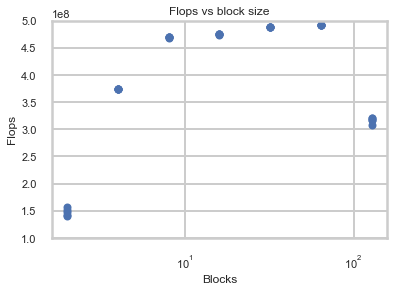

In [6]:
# plot code: Flops vs block size
# put your read speed plotting code here
# todo
# put your write speed plotting code here
# I recommend using matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import numpy as np

#optional, load seaborn for nicer looking plots
import seaborn as sns
'''
This breaks for versions of seaborn < 0.11.0. Google Colab has latest version.
To install in Anaconda, use "conda install seaborn=0.11.2"
'''
sns.set_theme(style="whitegrid",context="poster", font_scale=0.5) 

#load column headers into array
data = np.genfromtxt('block.csv', delimiter=',', names=True)

#create figure
f,ax = plt.subplots()
ax.set(xscale='log',ylim=(100000000, 500000000),ylabel='Flops',xlabel='Blocks')
plt.scatter(data['B'],data['Flops'],marker='.')
plt.title("Flops vs block size")
plt.show()

# # put your read speed plotting code here
# data = np.genfromtxt('block.csv', delimiter=',', names=True)

# f,ax = plt.subplots()
# ax.set(ylabel='Flops',xlabel='Blocks', title="Flops vs block size")

# sns.boxplot(x=data['B'],y=data['Flops'])

**3.2.2 DELIVERABLE (20 points):** Using a dedicated node via SLURM, for $N=2^{12}=4096$ create a statistical plot that compares (i) the Flops (use a proper SI prefix, such as GFlops) and (ii) execution time between the naive method (you should already have these numbers) and the four new adjustments. Properly label each algorithm. Discuss the impact of each matrix multiply method.

* Link your **commented** `matrix_multiply_transpose.c` code: [matrix_multiply_transpose.c](matrix_multiply_transpose.c)
* Link your **commented** `matrix_multiply_looporder.c` code: [matrix_multiply_looporder.c](matrix_multiply_flipped.c)

**Discussion**: the transposed method is the fastest as the memory allocation of transposed matrix is optimal for CPU's memory access, becuase each cell of memories are closer to each other. Loop order also increased the speed significally compared to naive method, due the similar cause of tranposed matrix. Optimized method also increased the speed, but its not as consistent and faster compared to transpose and looporder. We picked the block size of 64 as it is the fastest among all blocks, and its improvement is slightly less than the loop order method. 

<AxesSubplot:title={'center':'Flops vs Algoritms'}, xlabel='Algoritms', ylabel='GFlops'>

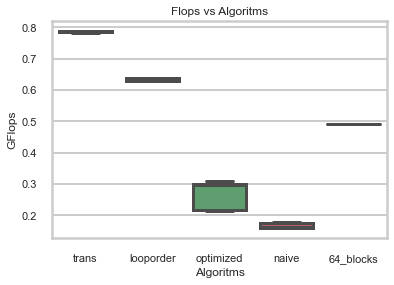

In [7]:
# plot code: statistical Flops based on algorithm
from operator import delitem
import matplotlib.pyplot as plt
import numpy as np

#optional, load seaborn for nicer looking plots
import seaborn as sns
'''
This breaks for versions of seaborn < 0.11.0. Google Colab has latest version.
To install in Anaconda, use "conda install seaborn=0.11.2"
'''
sns.set_theme(style="whitegrid",context="poster", font_scale=0.5) 

#load column headers into array
trans_data = np.genfromtxt('matmul_transpose.csv', delimiter=',', names=True)
trans_flops_4096 = trans_data["Flops"] / 10**9

looporder_data = np.genfromtxt('matmul_flipped.csv', delimiter=',', names=True)
looporder_flops_4096 = looporder_data["Flops"]/ 10**9

optimized_data = np.genfromtxt('matmul_optimized.csv', delimiter=',', names=True)
optimized_flops_4096 = optimized_data["Flops"]/ 10**9

naive_data = np.genfromtxt('matmul_naive.csv', delimiter=',', names=True)
naive_flops_4096 = naive_data["Flops"][-5:]/ 10**9

block_data = np.genfromtxt("block.csv", delimiter=',', names=True)
block_flops_4096 = block_data["Flops"][-10:-5]/ 10**9

x_axis = []
x_axis.extend("trans" for i in range(5))
x_axis.extend("looporder" for i in range(5))
x_axis.extend("optimized" for i in range(5))
x_axis.extend("naive" for i in range(5))
x_axis.extend("64_blocks" for i in range(5))
y_axis_flops = []
y_axis_flops.extend(trans_flops_4096)
y_axis_flops.extend(looporder_flops_4096)
y_axis_flops.extend(optimized_flops_4096)
y_axis_flops.extend(naive_flops_4096)
y_axis_flops.extend(block_flops_4096)

#create figure
f,ax = plt.subplots()
ax.set(ylabel='GFlops',xlabel='Algoritms', title="Flops vs Algoritms")

sns.boxplot(x=x_axis,y=y_axis_flops)



<AxesSubplot:title={'center':'time vs Algoritms'}, xlabel='Algoritms', ylabel='Time(s)'>

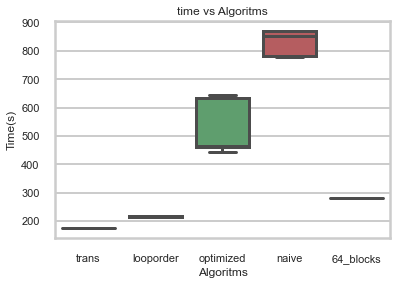

In [8]:
# plot code: statistical execution time based on algorithm
trans_time_4096 = trans_data['s']

looporder_time_4096 = looporder_data['s']

optimized_time_4096 = optimized_data['s']

naive_time_4096 = naive_data['s'][-5:]

block_time_4096 = block_data["s"][-10:-5]

y_axis_time = []
y_axis_time.extend(trans_time_4096)
y_axis_time.extend(looporder_time_4096)
y_axis_time.extend(optimized_time_4096)
y_axis_time.extend(naive_time_4096)
y_axis_time.extend(block_time_4096)


#create figure
f,ax = plt.subplots()
ax.set(ylabel='Time(s)',xlabel='Algoritms', title="time vs Algoritms")

sns.boxplot(x=x_axis,y=y_axis_time)




**3.2.3 DELIVERABLE (5 points):** Report in a markdown table the cache-misses and instructions per cycle between the five versions of the algorithm. You only need to report these for one run per algorithm. How do they compare and correlate with the timing information above?

| Algorithm      | Cache Misses | Instructions Per Cycle |
| -------------- | ------------ | ---------------------- |
| Naive          |      1278    |             0.67       |
| O3             |        859   |  0.71                  |
| Transpose      |         948  |0.70                    |
| Loop Order     |           871|0.71                    |
| Blocking       |           798|0.75                    |

**Discussion**: the naive method has the highest cache misses and lowest instruction per cycle as expected due to its poor memory allocation. and we did not see significant difference between other optimzed method on terms of caches misses and instructions per cycle, but they are still much imporved than naive method.

**3.3.1 DELIVERABLE (15 points):** On a dedicated SLURM node, using the same $N$ as the matrix multiply section, plot (i) execution time (s) vs. N, and (ii) Flops vs. N for the two algorithms. 

Link to your dot product dataset: [dotproduct.csv](dotproduct.csv)

Link to your matrix-vector product dataset: [matrixvector.csv](matrixvector.csv)

Link to your **commented** dot product code: [dot_product_naive.c](dot_product_naive.c)

Link to your **commented** matrix-vector product code: [matrix_vector_product_naive.c](matrix_vector_product_naive.c)

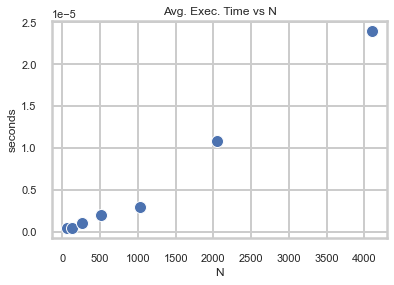

In [9]:
# plot code: average execution time vs N plot (dot product)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dataFrame = pd.read_csv("dotproduct_ave.csv")

sns.scatterplot(dataFrame['N'],dataFrame['s'])

plt.xlabel("N")
plt.ylabel("seconds")
plt.title("Avg. Exec. Time vs N")
plt.show()

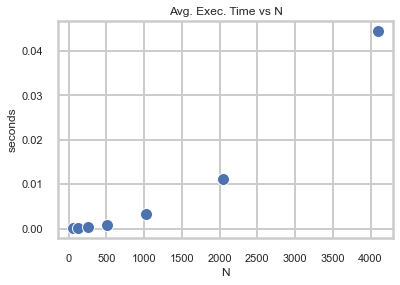

In [10]:
# plot code: average execution time vs N plot (matrix-vector product)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dataFrame = pd.read_csv("matrixvector_ave.csv")

sns.scatterplot(dataFrame['N'],dataFrame['s'])

plt.xlabel("N")
plt.ylabel("seconds")
plt.title("Avg. Exec. Time vs N")
plt.show()

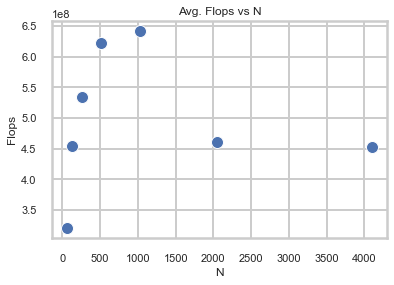

In [11]:
# plot code: average Flops vs N plot (dot product)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dataFrame = pd.read_csv("dotproduct_ave.csv")

sns.scatterplot(dataFrame['N'],dataFrame['Flops'])

plt.xlabel("N")
plt.ylabel("Flops")
plt.title("Avg. Flops vs N")
plt.show()

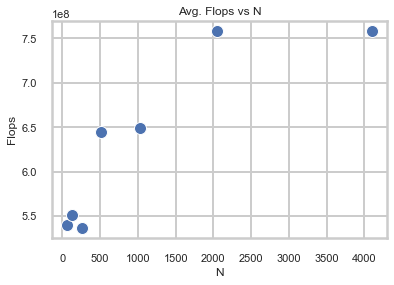

In [12]:
# plot code: average Flops vs N plot (matrix-vector product)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dataFrame = pd.read_csv("matrixvector_ave.csv")

sns.scatterplot(dataFrame['N'],dataFrame['Flops'])

plt.xlabel("N")
plt.ylabel("Flops")
plt.title("Avg. Flops vs N")
plt.show()

**3.3.2 DELIVERABLE (5 points):** Create a plot that compares the execution time of matrix-matrix, matrix-vector, and dot products. Validate that the algorithms scale linearly, quadratically, and cubicly. You may need to have a second plot with a scaled Y-axis to see all three plots clearly. Try to fit a linear, quadratic, and cubic polynomial to the three datasets. 

Discuss the scaling of the three algorithms. 

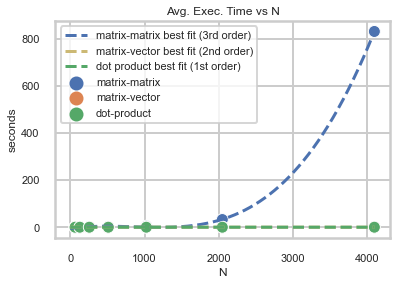

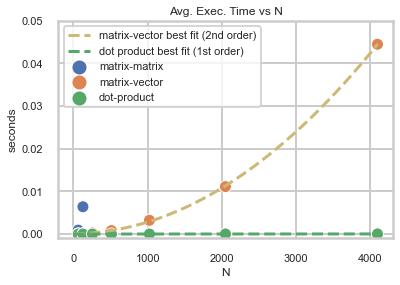

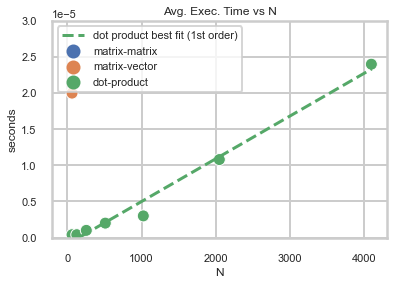

Dot product best fit line: y = 5.919936193320662e-09*x + -9.310344827586255e-07
Matrix-vector product best fit line: y = 2.611974293816255e-09*x^2 + 1.4682514170282202e-07*x + 5.944222553402844e-05
Matrix-matrix product best fit line: y = -6.36872953958494e-05*x^3 + -6.36872953958494e-05*x^2 0.04415154129957325*x + -5.1241824642859415


In [13]:
# plot code: execution time vs. N for all three algorithms

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dataFrame = pd.read_csv("matrix_vector_dot.csv")
dataFrame_matmul = pd.read_csv("matmul_naive_ave.csv")
dataFrame_matvec = pd.read_csv("matrixvector_ave.csv")
dataFrame_dot = pd.read_csv("dotproduct_ave.csv")

z_dot = np.polyfit(dataFrame_dot['N'],dataFrame_dot['s'],1)
z_matvec = np.polyfit(dataFrame_matvec['N'],dataFrame_matvec['s'],2)
z_matmul = np.polyfit(dataFrame_matmul['N'],dataFrame_matmul['s'],3)

x_plot = np.linspace(0,4100,100000)
y_dot = z_dot[0] * x_plot + z_dot[1]
y_matvec = z_matvec[0] * pow(x_plot,2) + z_matvec[1] * x_plot + z_matvec[2]
y_matmul = (z_matmul[0] * pow(x_plot,3) + z_matmul[1] * pow(x_plot,2) + 
            z_matmul[2] * x_plot + z_matmul[3])

sns.scatterplot(dataFrame['N'],dataFrame['s'], hue=dataFrame['kind'])

plt.xlabel("N")
plt.ylabel("seconds")
plt.title("Avg. Exec. Time vs N")
plt.plot(x_plot, y_matmul, 'b--', label = "matrix-matrix best fit (3rd order)")
plt.plot(x_plot, y_matvec, 'y--', label = "matrix-vector best fit (2nd order)")
plt.plot(x_plot, y_dot, 'g--', label = "dot product best fit (1st order)")
plt.legend()
plt.show()

sns.scatterplot(dataFrame['N'],dataFrame['s'], hue=dataFrame['kind'])

plt.xlabel("N")
plt.ylabel("seconds")
plt.title("Avg. Exec. Time vs N")
plt.ylim(-0.001,0.05)
plt.plot(x_plot, y_matvec, 'y--', label = "matrix-vector best fit (2nd order)")
plt.plot(x_plot, y_dot, 'g--', label = "dot product best fit (1st order)")
plt.legend()
plt.show()

sns.scatterplot(dataFrame['N'],dataFrame['s'], hue=dataFrame['kind'])

plt.xlabel("N")
plt.ylabel("seconds")
plt.title("Avg. Exec. Time vs N")
plt.ylim(-0.0000001,0.00003)
plt.plot(x_plot, y_dot, 'g--', label = "dot product best fit (1st order)")
plt.legend()
plt.show()


print(f"Dot product best fit line: y = {z_dot[0]}*x + {z_dot[1]}")
print(f"Matrix-vector product best fit line: y = {z_matvec[0]}*x^2 + {z_matvec[1]}*x + {z_matvec[2]}")
print(f"Matrix-matrix product best fit line: y = {z_matmul[1]}*x^3 + {z_matmul[1]}*x^2 {z_matmul[2]}*x + {z_matmul[3]}")